<a href="https://colab.research.google.com/github/MarquinDj/ProGorjetas/blob/main/ProjGorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando base de dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#Tradução

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill' : 'valor_total', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No':'Não',
    'Yes': 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta', 
    'Fri': 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 3.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pandas, scipy, matplotlib
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [ ]:
gorjetas.columns

Index(['valor_total', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora_do_dia',
       'total_de_pessoas'],
      dtype='object')

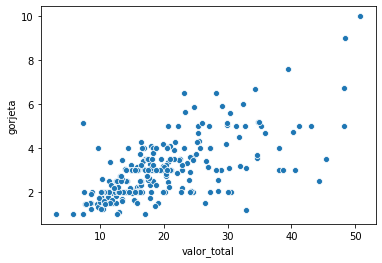

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_total', y= 'gorjeta', data = gorjetas )

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [ ]:
print('A base de dados cotém {} registros'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados cotém 244 registros
Registros não nulos


valor_total         244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [ ]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_total']

In [ ]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [ ]:
gorjetas['porcentagem'] = gorjetas['porcentagem'].round(2) * 100

In [ ]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0
3,23.68,3.31,Não,Domingo,Jantar,2,14.0
4,24.59,3.61,Não,Domingo,Jantar,4,15.0


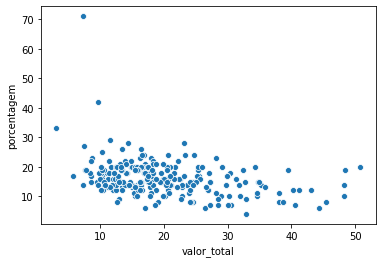

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_total', y='porcentagem', data = gorjetas)

**Visualmente, o valor da conto não é proporcional ao valor da gorjeta**

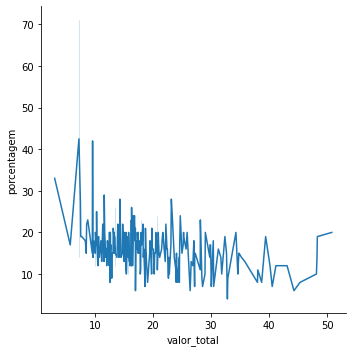

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_total', y='porcentagem', kind = 'line', data = gorjetas)

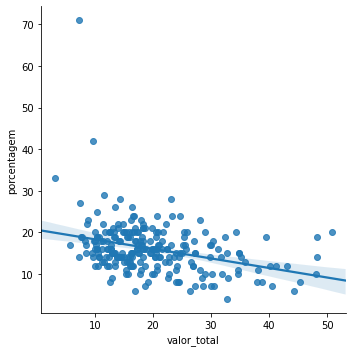

In [ ]:
sns.lmplot(x='valor_total', y='porcentagem', data = gorjetas)

# Análise 2 - Sobremesa

In [ ]:
gorjetas.head()

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,6.0
1,10.34,1.66,Não,Domingo,Jantar,3,16.0
2,21.01,3.50,Não,Domingo,Jantar,3,17.0
3,23.68,3.31,Não,Domingo,Jantar,2,14.0
4,24.59,3.61,Não,Domingo,Jantar,4,15.0


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_total,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.322581
std,9.832154,1.401468,0.810751,8.505959
min,3.070000,1.000000,1.000000,4.000000
25%,13.420000,2.000000,2.000000,11.000000
50%,17.920000,3.000000,2.000000,15.000000
75%,26.860000,3.680000,3.000000,20.000000
max,50.810000,10.000000,5.000000,71.000000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_total,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.953642
std,8.255582,1.377190,1.017984,3.988881
min,7.250000,1.000000,1.000000,6.000000
25%,13.325000,2.000000,2.000000,14.000000
50%,17.590000,2.740000,2.000000,16.000000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.000000


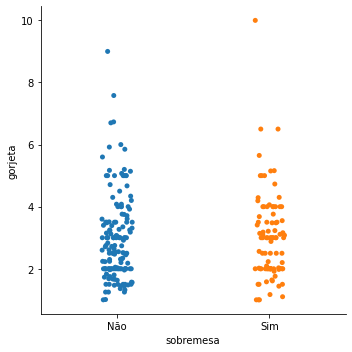

In [ ]:
sns.catplot(x ='sobremesa', y = 'gorjeta', data= gorjetas)

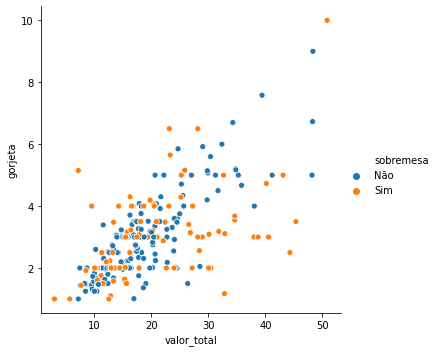

In [ ]:
sns.relplot(x ='valor_total', y = 'gorjeta', hue='sobremesa',data= gorjetas)

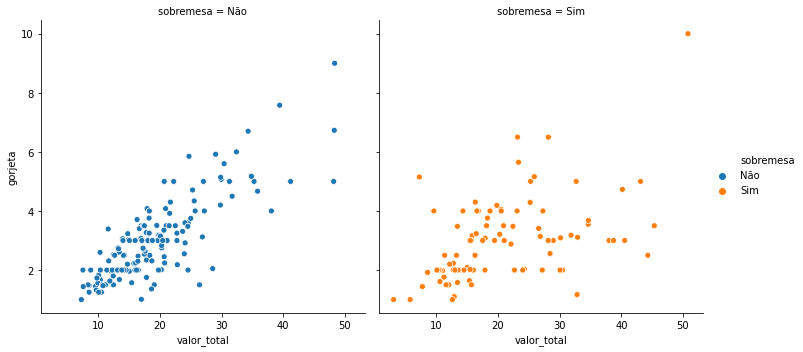

In [ ]:
sns.relplot(x ='valor_total', y = 'gorjeta', hue='sobremesa', col= 'sobremesa',data= gorjetas)

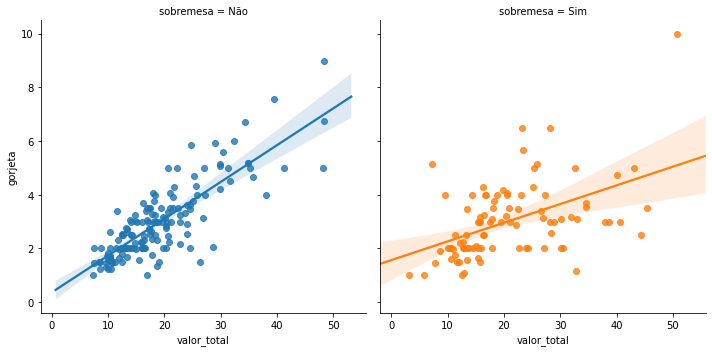

In [ ]:
sns.lmplot(x ='valor_total', y = 'gorjeta', hue='sobremesa', col= 'sobremesa',data= gorjetas)

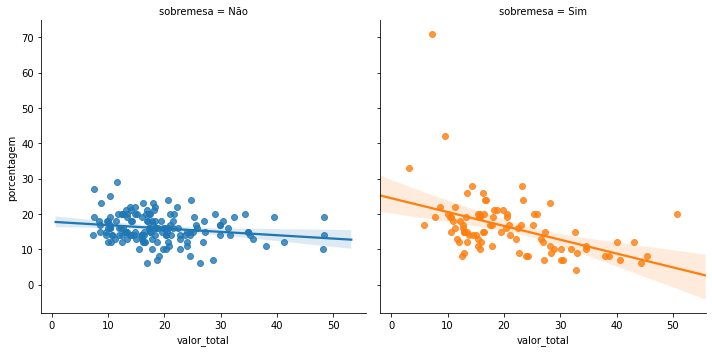

In [ ]:
sns.lmplot(x ='valor_total', y = 'porcentagem', hue='sobremesa', col= 'sobremesa',data= gorjetas)

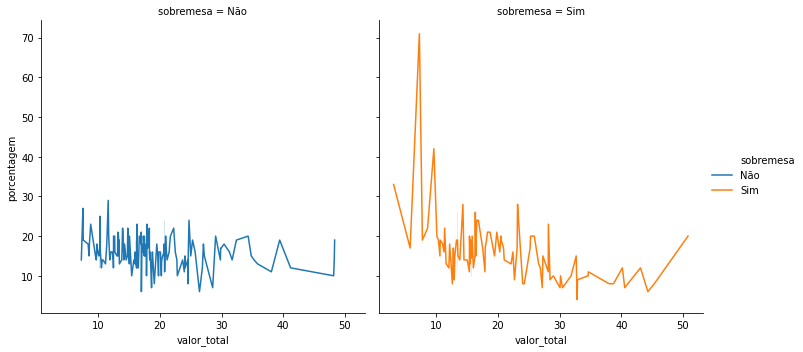

In [ ]:
sns.relplot(x ='valor_total', y = 'porcentagem', hue='sobremesa', col= 'sobremesa',data= gorjetas, kind= 'line')

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

**H<sup>o</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos 2 grupos**

**H<sup>1</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos 2 grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query('sobremesa == "Sim"').porcentagem
sobremesa

56      8.0
58     16.0
60     16.0
61     14.0
62     18.0
       ... 
234    19.0
236     8.0
237     4.0
240     7.0
241     9.0
Name: porcentagem, Length: 93, dtype: float64

In [ ]:
sem_sobremesa = gorjetas.query('sobremesa == "Não"').porcentagem

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


# Análise 3 - Dias da Semana

In [ ]:
gorjetas['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

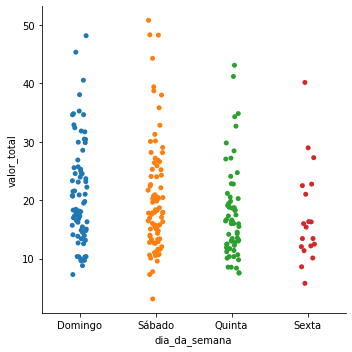

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_total', data = gorjetas)

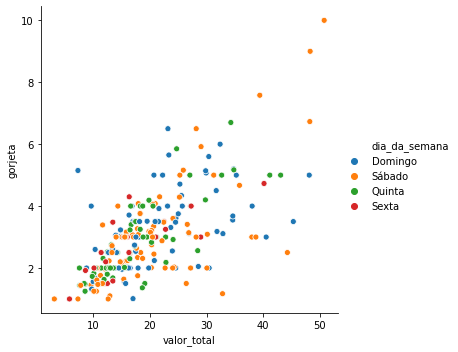

In [ ]:
sns.relplot(x='valor_total', y = 'gorjeta', hue = 'dia_da_semana' ,data = gorjetas)

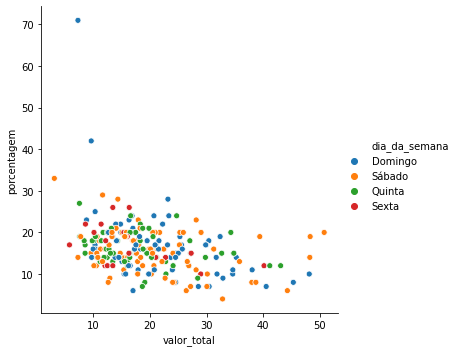

In [ ]:
sns.relplot(x='valor_total', y = 'porcentagem', hue = 'dia_da_semana' ,data = gorjetas)

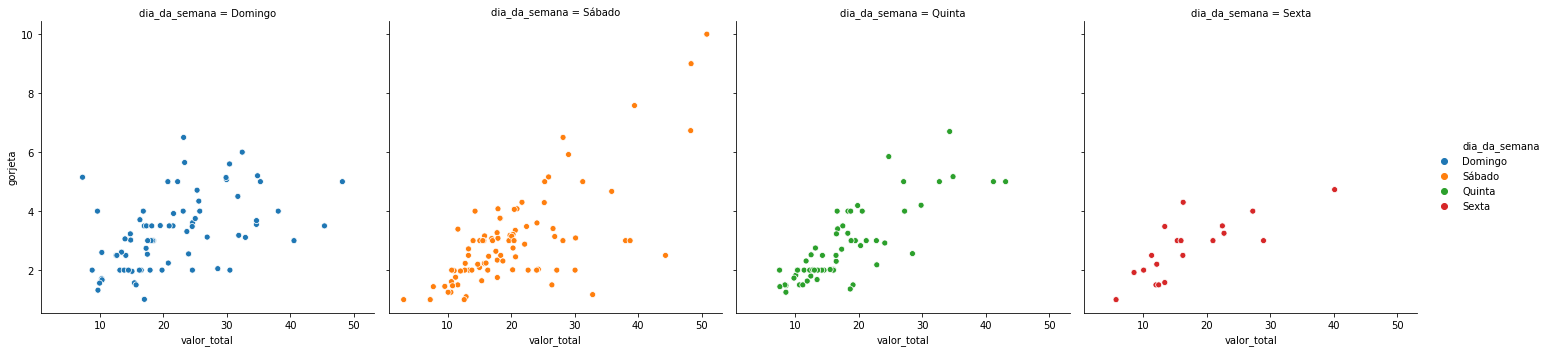

In [ ]:
sns.relplot(x='valor_total', y = 'gorjeta', hue = 'dia_da_semana',  col='dia_da_semana',data = gorjetas)

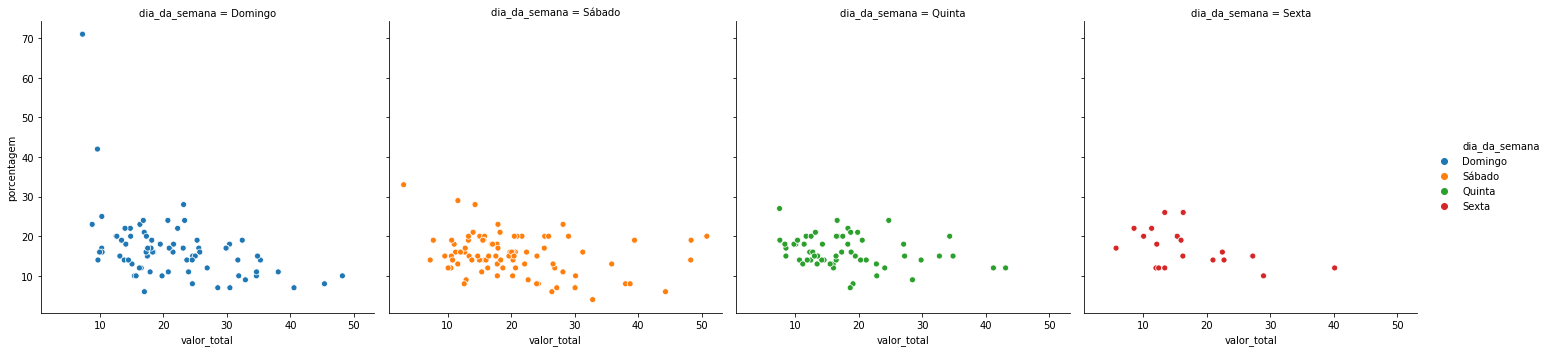

In [ ]:
sns.relplot(x='valor_total', y = 'porcentagem', hue = 'dia_da_semana',  col='dia_da_semana',data = gorjetas)

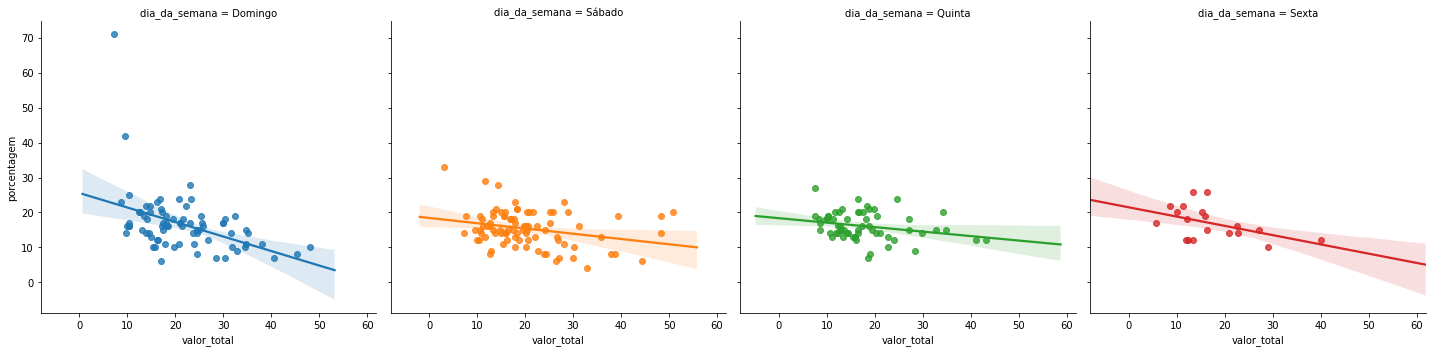

In [ ]:
sns.lmplot(x='valor_total', y = 'porcentagem', hue = 'dia_da_semana',  col='dia_da_semana',data = gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas['gorjeta'].mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_total', 'gorjeta', 'porcentagem']]

,valor_total,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.697368
Quinta,17.682742,2.771452,16.112903
Sexta,17.151579,2.734737,16.947368
Sábado,20.441379,2.993103,15.367816


In [ ]:
gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>o</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>1</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [ ]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_total

In [ ]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_total

In [ ]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado )
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


# Análise 4 - Hora do dia

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

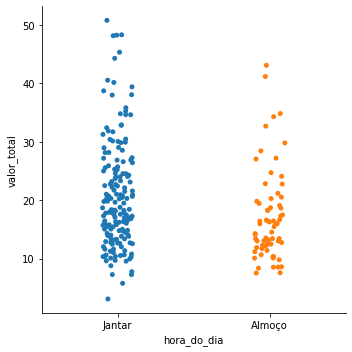

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_total', data = gorjetas)

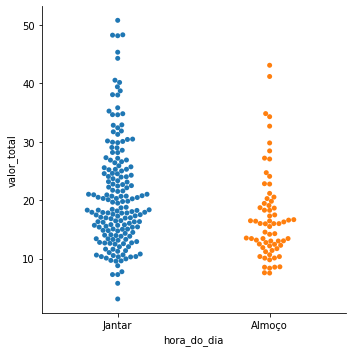

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_total', kind='swarm', data = gorjetas)

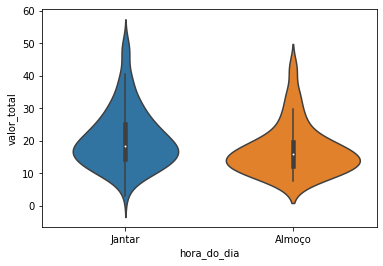

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_total', data = gorjetas)

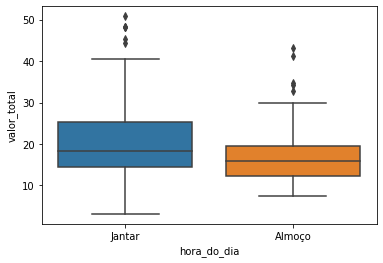

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_total', data = gorjetas)

In [ ]:
almoco = gorjetas.query('hora_do_dia == "Almoço"').valor_total

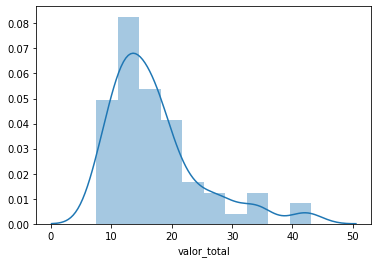

In [ ]:
sns.distplot(almoco)

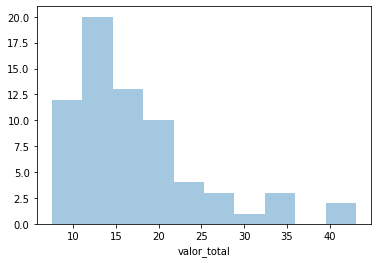

In [ ]:
sns.distplot(almoco, kde = False)

In [ ]:
jantar = gorjetas.query('hora_do_dia == "Jantar"').valor_total

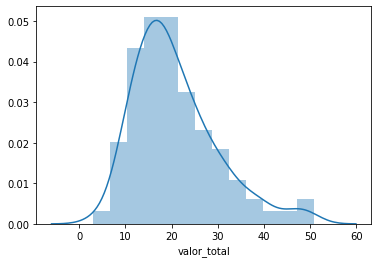

In [ ]:
sns.distplot(jantar)

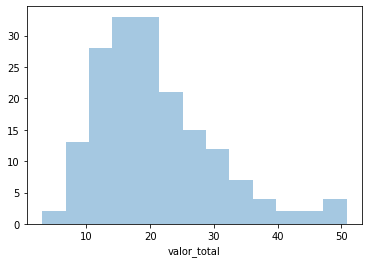

In [ ]:
sns.distplot(jantar, kde = False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_total', 'gorjeta', 'porcentagem']]

,valor_total,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,16.397059
Jantar,20.797159,3.102670,15.977273


## Teste de Hipótese

**H<sup>o</sup>**

> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>1</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [ ]:
r2 = ranksums(jantar, almoco)
print('O valor do p_valor é de {}' .format(r2.pvalue))

O valor do p_valor é de 0.0011791039723641672


In [ ]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [ ]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p_valor é de {}' .format(r3.pvalue))

O valor do p_valor é de 0.2602493995587126
